In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

boston_1 = load_boston()
boston = pd.DataFrame(boston_1.data, columns=boston_1.feature_names)
boston['MEDV'] = boston_1.target

info={'CRIM' :    'per capita crime rate by town',
        'ZN' :      'proportion of residential land zoned for lots over 25,000 sq.ft',
        'INDUS'    :'proportion of non-retail business acres per town',            
        'CHAS'     :'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
         'NOX'      :'nitric oxides concentration (parts per 10 million)',
         'RM'      : 'average number of rooms per dwelling',
        'AGE'     :'proportion of owner-occupied units built prior to 1940',
        'DIS'      :'weighted distances to five Boston employment centres',
        'RAD'      :'index of accessibility to radial highways',
         'TAX'      :'full-value property-tax rate per $10,000',
         'PTRATIO'  :'pupil-teacher ratio by town',
         'B'        :'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
         'LSTAT'    :'% lower status of the population',
         'MEDV'     :'Median value of owner-occupied homes in $1000s'}

In [2]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


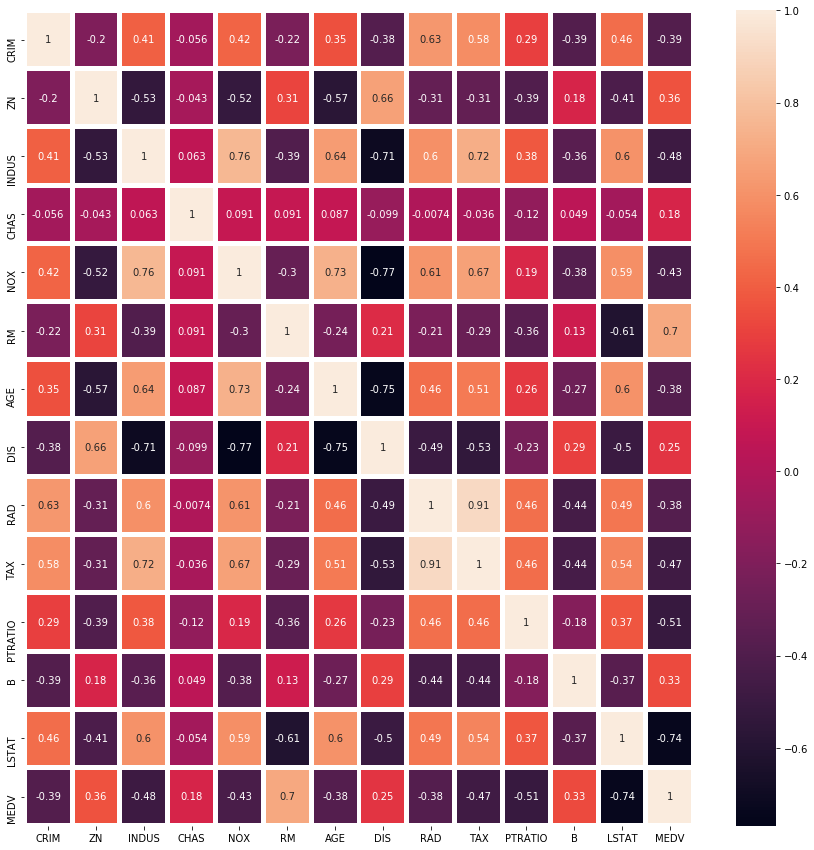

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(boston.corr(),annot=True,linewidths=4)

In [7]:
final_boston=boston[['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','MEDV']]

In [8]:
final_boston.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,MEDV
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [10]:
y=final_boston['MEDV']
x=final_boston.drop(columns='MEDV')

In [12]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.2879095 , -0.14421743,  0.41367189, -0.66660821, -1.45900038,
        -1.0755623 ],
       [-0.59338101, -0.74026221,  0.19427445, -0.98732948, -0.30309415,
        -0.49243937],
       [-0.59338101, -0.74026221,  1.28271368, -0.98732948, -0.30309415,
        -1.2087274 ],
       ...,
       [ 0.11573841,  0.15812412,  0.98496002, -0.80321172,  1.17646583,
        -0.98304761],
       [ 0.11573841,  0.15812412,  0.72567214, -0.80321172,  1.17646583,
        -0.86530163],
       [ 0.11573841,  0.15812412, -0.36276709, -0.80321172,  1.17646583,
        -0.66905833]])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [14]:
model_reg=LinearRegression()
model_reg.fit(x_train,y_train)


LinearRegression()

In [15]:
y_pred=model_reg.predict(x_test)

In [18]:
data=pd.DataFrame({'Actual':y_test,
     'prediction':y_pred})

In [19]:
data

,Actual,prediction
173,23.6,26.450690
274,32.4,31.077517
491,13.6,17.130827
72,22.8,25.602673
452,16.1,17.804081
...,...,...
418,8.8,14.316405
117,19.2,22.830567
42,25.3,26.759130
322,20.4,23.359424


In [20]:
model_reg.score(x_train,y_train)

0.6916029518631046

In [21]:
model_reg.score(x_test,y_test)

0.6280941083861222

In [23]:
import statsmodels.api as sm
model_1=sm.OLS(endog=y,exog=x).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1679.
Date:                Wed, 23 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:56:04   Log-Likelihood:                         -1561.0
No. Observations:                 506   AIC:                                      3134.
Df Residuals:                     500   BIC:                                      3159.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
model_reg_1=LinearRegression()
model_reg_1.fit(x1_train,y1_train)
print("Training Completed")

Training Completed


In [26]:
y1_pred=model_reg_1.predict(x1_test)
data1=pd.DataFrame({'Actual':y1_test,
                   'Prediction':y1_pred})
data1

,Actual,Prediction
173,23.6,26.450690
274,32.4,31.077517
491,13.6,17.130827
72,22.8,25.602673
452,16.1,17.804081
...,...,...
418,8.8,14.316405
117,19.2,22.830567
42,25.3,26.759130
322,20.4,23.359424


In [27]:
model_reg_1.score(x1_test,y1_test)

0.6280941083861231

In [28]:
import sklearn.metrics as metrics
print(metrics.mean_squared_error(y_test,y_pred))

26.043507297920815


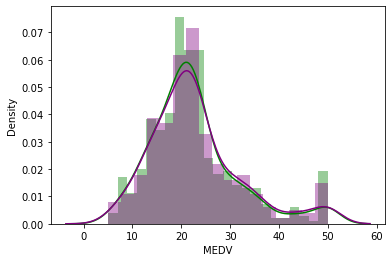

In [29]:
sns.distplot(y,color = "green")
sns.distplot(y_train,color = "purple")

In [30]:
print(metrics.mean_absolute_error(y_test,y_pred))

3.3959250174208386


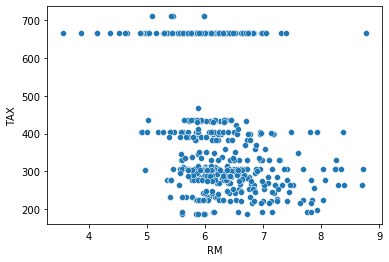

In [31]:
sns.scatterplot(x='RM',y='TAX',data=boston)

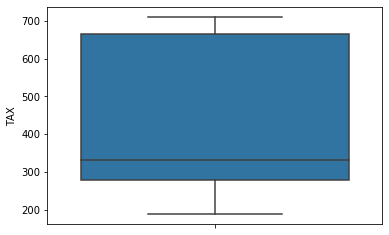

In [34]:
sns.boxplot(y='TAX',hi,data=boston)

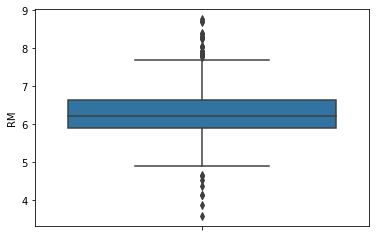

In [36]:
sns.boxplot(y='RM',data=boston)

In [ ]:
boston